In [80]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 
import json


In [81]:
df_copy = pd.read_csv("scout_copy.csv", index_col = 0 )

In [82]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             15919 non-null  object 
 1   short_description      15919 non-null  object 
 2   body_type              15919 non-null  object 
 3   price                  15919 non-null  int64  
 4   vat                    15919 non-null  object 
 5   km                     15919 non-null  int64  
 6   registration           15919 non-null  int64  
 7   prev_owner             15919 non-null  object 
 8   hp                     15919 non-null  int64  
 9   Type                   15919 non-null  object 
 10  Next Inspection        15919 non-null  int64  
 11  Inspection new         15919 non-null  object 
 12  Warranty               15919 non-null  object 
 13  Make                   15919 non-null  object 
 14  Model                  15919 non-null  object 
 15  Of

In [4]:
df_copy.head()

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,...,Fuel,Consumption,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Gears,Country version
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013,2016,2 previous owners,66,Used,...,Diesel,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...",['\nEuro 6\n'],"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Voice...","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Sicherheit:', ' ', 'Deaktivierung für ...",NaN,NaN
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000,2017,NaN,141,Used,...,Gasoline,"[['5.6 l/100 km (comb)'], ['7.1 l/100 km (city...",['\nEuro 6\n'],"['Air conditioning', 'Automatic climate contro...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats', 'Sport suspens...","['ABS', 'Central door lock', 'Central door loc...",['\nLangstreckenfahrzeug daher die hohe Kilome...,['\n7\n'],NaN
2,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450,2016,1 previous owner,85,Used,...,Diesel,"[['3.8 l/100 km (comb)'], ['4.4 l/100 km (city...",['\nEuro 6\n'],"['Air conditioning', 'Cruise control', 'Electr...","['MP3', 'On-board computer']","['Alloy wheels', 'Voice Control']","['ABS', 'Central door lock', 'Daytime running ...","['\n', 'Fahrzeug-Nummer: AM-95365', ' ', 'Ehem...",NaN,NaN
3,Audi A1,1.4 TDi Design S tronic,Sedans,14500,NaN,73000,2016,1 previous owner,66,Used,...,Diesel,"[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city...",['\nEuro 6\n'],"['Air suspension', 'Armrest', 'Auxiliary heati...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport seats', 'Voice Control']","['ABS', 'Alarm system', 'Central door lock wit...","['\nAudi A1: ', '- 1e eigenaar ', '- Perfecte ...",['\n6\n'],NaN
4,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,NaN,16200,2016,1 previous owner,66,Used,...,Diesel,"[['4.1 l/100 km (comb)'], ['4.6 l/100 km (city...",['\nEuro 6\n'],"['Air conditioning', 'Armrest', 'Automatic cli...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...","['\n', 'Technik & Sicherheit:', 'Xenon plus', ...",NaN,['\nGermany\n']


**fiyat sütünu boxplot**

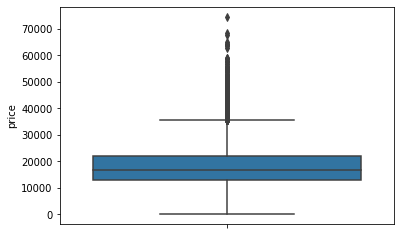

In [99]:
sb.boxplot(y=df_copy.price)

**marka ve modeel ortalama fiyatları**

In [101]:
a = df_copy.groupby("make_model").price.mean()
a

make_model
Audi A1           18864.688982
Audi A2           28200.000000
Audi A3           20996.693252
Opel Astra        15834.663895
Opel Corsa        11047.095539
Opel Insignia     21463.451886
Renault Clio      11940.320827
Renault Duster    13230.176471
Renault Espace    30080.211907
Name: price, dtype: float64

In [125]:
a1 = pd.DataFrame(a)
a1 = a1.sort_values(by = "price", ascending = False)
a1

,price
make_model,
Renault Espace,30080.211907
Audi A2,28200.000000
Opel Insignia,21463.451886
Audi A3,20996.693252
Audi A1,18864.688982
Opel Astra,15834.663895
Renault Duster,13230.176471
Renault Clio,11940.320827
Opel Corsa,11047.095539


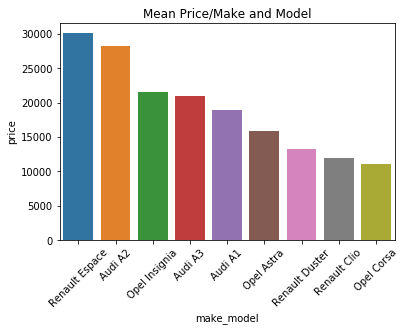

In [124]:
fig, ax = plt.subplots()
ax.set(xlabel = "Make and Model", ylabel = "Price", title = "Mean Price/Make and Model")
plt.xticks(rotation=45)
sb.barplot(x = a1.index, y = a1.price);

**Make/Mean Price**

In [5]:
x = round(df_copy.groupby("Make").price.mean())

In [6]:
dt = pd.DataFrame(x)

In [7]:
dt

,price
Make,
Audi,20022.0
Opel,16379.0
Renault,18232.0


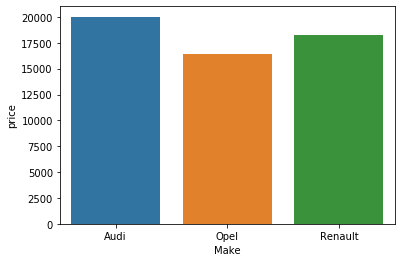

In [8]:
sb.barplot(dt.index, dt.price);


yukarıdaki grafik incelendiğinden audi ortalama olarak en yüksek fiayatlara sahipken, renoult 2., ortalama en düşük fiyat ise opelin.

**make_model/km**

In [141]:
km = df_copy.groupby("make_model").km.aggregate( [np.mean, max])
km1 = pd.DataFrame(km)
km1 = km.sort_values(by = "mean", ascending = False)
km1

,mean,max
make_model,,
Opel Insignia,39066.932640,232000
Audi A3,38802.696803,291800
Opel Astra,37231.079177,260000
Renault Espace,33908.377397,240000
Renault Clio,29453.740076,163500
Audi A2,26166.000000,26166
Opel Corsa,25110.259576,317000
Audi A1,22646.758607,192000
Renault Duster,5341.647059,10000


In [142]:
type(km1)

pandas.core.frame.DataFrame

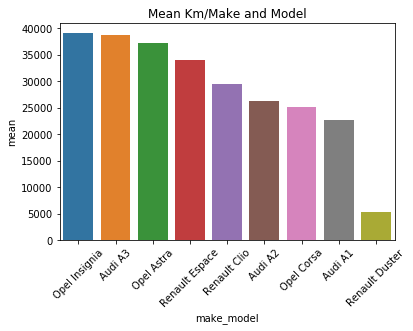

In [144]:
fig, ax = plt.subplots()
ax.set(xlabel = "Make and Model", ylabel = "Km", title = "Mean Km/Make and Model")
plt.xticks(rotation=45)
sb.barplot(x = km1.index, y = km1["mean"]);

**type**

In [9]:
df_copy.Type.value_counts()

Used              11097
New                1650
Pre-registered     1365
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64

In [10]:
df_copy.groupby("Make").Model.value_counts(dropna = False)

Make     Model   
Audi     A3          3097
         A1          2614
         A2             1
Opel     Insignia    2598
         Astra       2526
         Corsa       2219
Renault  Clio        1839
         Espace       991
         Duster        34
Name: Model, dtype: int64

In [11]:
df_copy.body_type.value_counts(normalize = True, dropna = False)

Sedans           0.497644
Station wagon    0.223821
Compact          0.198568
Van              0.050254
Other            0.018343
Transporter      0.005716
Off-Road         0.003581
Coupe            0.001570
Convertible      0.000503
Name: body_type, dtype: float64

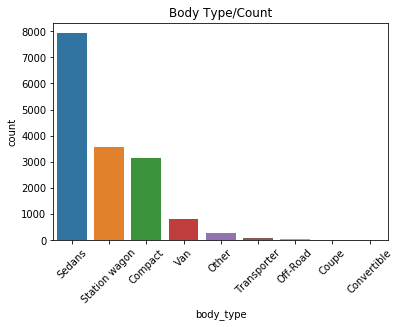

In [12]:
fig, ax = plt.subplots()
ax.set(xlabel = "Body Type", ylabel = "Count", title = "Body Type/Count")
plt.xticks(rotation=45)
sb.countplot(df_copy.body_type, order = df_copy.body_type.value_counts(normalize = True ).index)

In [13]:
df_copy["Gearing Type"].value_counts(normalize = True, dropna = False )

Manual            0.512155
Automatic         0.458383
Semi-automatic    0.029462
Name: Gearing Type, dtype: float64

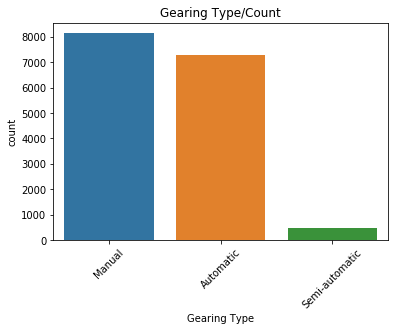

In [14]:
fig, ax = plt.subplots()
ax.set(xlabel = "Gearing Type", ylabel = "Count", title = "Gearing Type/Count")
plt.xticks(rotation=45)
sb.countplot(df_copy["Gearing Type"], order = df_copy["Gearing Type"].value_counts(normalize = True ).index)

In [15]:
round(df_copy.groupby("Gearing Type").price.mean())

Gearing Type
Automatic         21163.0
Manual            14907.0
Semi-automatic    23237.0
Name: price, dtype: float64

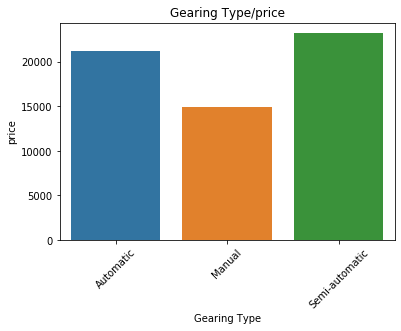

In [16]:
fig, ax = plt.subplots()
ax.set(xlabel = "Gearing Type", ylabel = "Count", title = "Gearing Type/price")
plt.xticks(rotation=45)
sb.barplot(df_copy.groupby("Gearing Type").price.mean().index, df_copy.groupby("Gearing Type").price.mean())

In [17]:
df_copy.groupby("Body Color").price.mean().sort_values(ascending = False )

Body Color
Yellow    23789.037736
Violet    23005.388889
Black     19053.282665
Grey      18976.655855
Brown     18680.307692
Orange    18166.666667
Green     18009.693252
Bronze    17807.000000
Blue      17473.746063
White     17351.966949
Beige     16785.490741
Silver    16547.770006
Red       15755.612740
Gold        134.000000
Name: price, dtype: float64

In [18]:
df_copy[df_copy["Body Color"] == "Gold"]
##gold renginde 2 araç var ve fiayt bilgileri yanlış girilmiş..

,make_model,short_description,body_type,price,vat,km,registration,prev_owner,hp,Type,...,Fuel,Consumption,Emission Class,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,description,Gears,Country version
6066,Opel Astra,1.6 D (CDTI) Start/Stop Sports Tourer Business,Station wagon,255,NaN,5563,2018,NaN,100,Used,...,Diesel,"[['3.8 l/100 km (comb)'], ['4.5 l/100 km (city...",['\nEuro 6\n'],"['Air conditioning', 'Cruise control', 'Electr...","['Bluetooth', 'Hands-free equipment', 'On-boar...",['Roof rack'],"['ABS', 'Central door lock with remote control...",[],['\n6\n'],NaN
8594,Opel Corsa,1.4 (ecoFLEX) Start/Stop Innovation,Sedans,13,NaN,123,2018,NaN,66,Used,...,Gasoline,"[['5.6 l/100 km (comb)'], ['6.8 l/100 km (city...",['\nEuro 6d-TEMP\n'],"['Air conditioning', 'Cruise control', 'Electr...","['Bluetooth', 'CD player', 'Hands-free equipme...",['Alloy wheels'],"['ABS', 'Adaptive headlights', 'Central door l...",[],['\n5\n'],NaN


**price and km coleration**

In [19]:
price = df_copy.price
price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [20]:
dt = pd.concat([df_copy.price, df_copy.km], axis = 1)

In [21]:
dt.head()

,price,km
0,15770,56013
1,14500,80000
2,14640,83450
3,14500,73000
4,16790,16200


In [22]:
dt.corr()  

,price,km
price,1.000000,-0.392767
km,-0.392767,1.000000


In [23]:
##km ile price arasında ters yönlü bir ilişki var. 

**price and registration**

In [24]:
dt["register"] = df_copy["registration"] 

In [25]:
dt.head()

,price,km,register
0,15770,56013,2016
1,14500,80000,2017
2,14640,83450,2016
3,14500,73000,2016
4,16790,16200,2016


In [26]:
dt.corr()

,price,km,register
price,1.000000,-0.392767,0.399704
km,-0.392767,1.000000,-0.671798
register,0.399704,-0.671798,1.000000


**price and body_type**

In [27]:
dt["body_type"] = df_copy.body_type

In [28]:
dt.head()

,price,km,register,body_type
0,15770,56013,2016,Sedans
1,14500,80000,2017,Sedans
2,14640,83450,2016,Sedans
3,14500,73000,2016,Sedans
4,16790,16200,2016,Sedans


In [29]:
dt1 = dt.body_type.str.strip().str.get_dummies()

In [30]:
dt2 = pd.concat([price,dt1], axis = 1)

In [31]:
dt2.corr()

,price,Compact,Convertible,Coupe,Off-Road,Other,Sedans,Station wagon,Transporter,Van
price,1.000000,-0.188553,0.030012,-0.020390,-0.007201,-0.071051,-0.039932,0.044868,-0.008031,0.399082
Compact,-0.188553,1.000000,-0.011161,-0.019741,-0.029839,-0.068042,-0.495421,-0.267294,-0.037742,-0.114500
Convertible,0.030012,-0.011161,1.000000,-0.000889,-0.001344,-0.003065,-0.022318,-0.012041,-0.001700,-0.005158
Coupe,-0.020390,-0.019741,-0.000889,1.000000,-0.002377,-0.005421,-0.039474,-0.021297,-0.003007,-0.009123
Off-Road,-0.007201,-0.029839,-0.001344,-0.002377,1.000000,-0.008194,-0.059664,-0.032190,-0.004545,-0.013789
Other,-0.071051,-0.068042,-0.003065,-0.005421,-0.008194,1.000000,-0.136053,-0.073404,-0.010365,-0.031444
Sedans,-0.039932,-0.495421,-0.022318,-0.039474,-0.059664,-0.136053,1.000000,-0.534469,-0.075468,-0.228948
Station wagon,0.044868,-0.267294,-0.012041,-0.021297,-0.032190,-0.073404,-0.534469,1.000000,-0.040717,-0.123524
Transporter,-0.008031,-0.037742,-0.001700,-0.003007,-0.004545,-0.010365,-0.075468,-0.040717,1.000000,-0.017442
Van,0.399082,-0.114500,-0.005158,-0.009123,-0.013789,-0.031444,-0.228948,-0.123524,-0.017442,1.000000


In [32]:
##compact, coupe, off-road, other, sedan, transporter sütünleri ile ters yönlü
##station ve van ile pzoitif yönlü ilişki var. van ile güçlü sayılabilecek pozitif yönlü bir ilişki var

**price and type**

In [33]:
dt3 = df_copy.Type.str.strip().str.get_dummies()

In [34]:
dt4 = pd.concat([price,dt3], axis = 1)

In [35]:
dt4.corr()

,price,Demonstration,Employee's car,New,Pre-registered,Used
price,1.000000,0.240871,0.013335,0.264705,0.113054,-0.365793
Demonstration,0.240871,1.000000,-0.059745,-0.078016,-0.070261,-0.348038
Employee's car,0.013335,-0.059745,1.000000,-0.088555,-0.079752,-0.395053
New,0.264705,-0.078016,-0.088555,1.000000,-0.104141,-0.515863
Pre-registered,0.113054,-0.070261,-0.079752,-0.104141,1.000000,-0.464584
Used,-0.365793,-0.348038,-0.395053,-0.515863,-0.464584,1.000000


In [36]:
##used ile ters yönlü güçlü bir ilişki var
## new, demo ile pozitif, employees car, pre-regestered ile pozitif ilişki var 

**price fuel**

In [37]:
dt5 = df_copy.Fuel.str.strip().str.get_dummies()

In [38]:
dt6 = pd.concat([price,dt5], axis = 1)

In [39]:
dt6.corr()

,price,Biogas,CNG,Diesel,Domestic,Electric,Electric/Gasoline,Gasoline,LPG,Liquid,Others,Regular/Benzine,Super
price,1.000000,0.009529,0.022186,0.019318,-0.005533,-0.010227,0.034998,-0.074767,-0.040135,-0.028632,-0.007563,0.036008,0.032262
Biogas,0.009529,1.000000,-0.000377,-0.007293,-0.000063,-0.000063,-0.000126,-0.004016,-0.000251,-0.000199,-0.000154,-0.001432,-0.005200
CNG,0.022186,-0.000377,1.000000,-0.043809,-0.000377,-0.000377,-0.000755,-0.024123,-0.001510,-0.001194,-0.000924,-0.008600,-0.031234
Diesel,0.019318,-0.007293,-0.043809,1.000000,-0.007293,-0.007293,-0.014588,-0.466247,-0.029188,-0.023070,-0.017868,-0.166217,-0.603695
Domestic,-0.005533,-0.000063,-0.000377,-0.007293,1.000000,-0.000063,-0.000126,-0.004016,-0.000251,-0.000199,-0.000154,-0.001432,-0.005200
Electric,-0.010227,-0.000063,-0.000377,-0.007293,-0.000063,1.000000,-0.000126,-0.004016,-0.000251,-0.000199,-0.000154,-0.001432,-0.005200
Electric/Gasoline,0.034998,-0.000126,-0.000755,-0.014588,-0.000126,-0.000126,1.000000,-0.008033,-0.000503,-0.000397,-0.000308,-0.002864,-0.010401
Gasoline,-0.074767,-0.004016,-0.024123,-0.466247,-0.004016,-0.004016,-0.008033,1.000000,-0.016072,-0.012703,-0.009839,-0.091524,-0.332413
LPG,-0.040135,-0.000251,-0.001510,-0.029188,-0.000251,-0.000251,-0.000503,-0.016072,1.000000,-0.000795,-0.000616,-0.005730,-0.020809
Liquid,-0.028632,-0.000199,-0.001194,-0.023070,-0.000199,-0.000199,-0.000397,-0.012703,-0.000795,1.000000,-0.000487,-0.004529,-0.016448


**make_model and price**

In [40]:
make_model = df_copy.make_model.str.strip().str.get_dummies()

In [41]:
dt7 = pd.concat([price,make_model], axis = 1)

In [42]:
dt7.corr()

,price,Audi A1,Audi A2,Audi A3,Opel Astra,Opel Corsa,Opel Insignia,Renault Clio,Renault Duster,Renault Espace
price,1.000000,0.050698,0.010925,0.198078,-0.128490,-0.379944,0.205898,-0.297480,-0.030002,0.420716
Audi A1,0.050698,1.000000,-0.003513,-0.217840,-0.192497,-0.178387,-0.195748,-0.160190,-0.020506,-0.114204
Audi A2,0.010925,-0.003513,1.000000,-0.003895,-0.003442,-0.003190,-0.003500,-0.002864,-0.000367,-0.002042
Audi A3,0.198078,-0.217840,-0.003895,1.000000,-0.213437,-0.197793,-0.217042,-0.177616,-0.022737,-0.126628
Opel Astra,-0.128490,-0.192497,-0.003442,-0.213437,1.000000,-0.174782,-0.191791,-0.156952,-0.020092,-0.111896
Opel Corsa,-0.379944,-0.178387,-0.003190,-0.197793,-0.174782,1.000000,-0.177734,-0.145448,-0.018619,-0.103694
Opel Insignia,0.205898,-0.195748,-0.003500,-0.217042,-0.191791,-0.177734,1.000000,-0.159603,-0.020431,-0.113786
Renault Clio,-0.297480,-0.160190,-0.002864,-0.177616,-0.156952,-0.145448,-0.159603,1.000000,-0.016720,-0.093116
Renault Duster,-0.030002,-0.020506,-0.000367,-0.022737,-0.020092,-0.018619,-0.020431,-0.016720,1.000000,-0.011920
Renault Espace,0.420716,-0.114204,-0.002042,-0.126628,-0.111896,-0.103694,-0.113786,-0.093116,-0.011920,1.000000


**body color and price**

In [43]:
Body_Color = df_copy["Body Color"].str.strip().str.get_dummies()

In [44]:
dt8 = pd.concat([price,Body_Color], axis = 1)

In [45]:
dt8.corr()

,price,Beige,Black,Blue,Bronze,Brown,Gold,Green,Grey,Orange,Red,Silver,Violet,White,Yellow
price,1.000000,-0.013813,0.079537,-0.024060,-0.000605,0.012371,-0.027145,-0.000141,0.070504,0.000273,-0.078903,-0.068622,0.022710,-0.048360,0.045145
Beige,-0.013813,1.000000,-0.046983,-0.026892,-0.001733,-0.011435,-0.000926,-0.008406,-0.044983,-0.001135,-0.021272,-0.028455,-0.002781,-0.044197,-0.004777
Black,0.079537,-0.046983,1.000000,-0.184969,-0.011923,-0.078652,-0.006372,-0.057821,-0.309405,-0.007805,-0.146312,-0.195721,-0.019127,-0.303998,-0.032856
Blue,-0.024060,-0.026892,-0.184969,1.000000,-0.006825,-0.045018,-0.003647,-0.033095,-0.177093,-0.004467,-0.083744,-0.112024,-0.010947,-0.173998,-0.018806
Bronze,-0.000605,-0.001733,-0.011923,-0.006825,1.000000,-0.002902,-0.000235,-0.002133,-0.011416,-0.000288,-0.005398,-0.007221,-0.000706,-0.011216,-0.001212
Brown,0.012371,-0.011435,-0.078652,-0.045018,-0.002902,1.000000,-0.001551,-0.014072,-0.075303,-0.001899,-0.035609,-0.047634,-0.004655,-0.073987,-0.007996
Gold,-0.027145,-0.000926,-0.006372,-0.003647,-0.000235,-0.001551,1.000000,-0.001140,-0.006101,-0.000154,-0.002885,-0.003859,-0.000377,-0.005994,-0.000648
Green,-0.000141,-0.008406,-0.057821,-0.033095,-0.002133,-0.014072,-0.001140,1.000000,-0.055359,-0.001396,-0.026178,-0.035018,-0.003422,-0.054391,-0.005879
Grey,0.070504,-0.044983,-0.309405,-0.177093,-0.011416,-0.075303,-0.006101,-0.055359,1.000000,-0.007472,-0.140082,-0.187387,-0.018312,-0.291054,-0.031457
Orange,0.000273,-0.001135,-0.007805,-0.004467,-0.000288,-0.001899,-0.000154,-0.001396,-0.007472,1.000000,-0.003534,-0.004727,-0.000462,-0.007342,-0.000794


**gearing type and price**

In [46]:
gear = df_copy["Gearing Type"].str.strip().str.get_dummies()

In [47]:
dt8 = pd.concat([price,gear], axis = 1)

In [48]:
dt8.corr()

,price,Automatic,Manual,Semi-automatic
price,1.000000,0.391512,-0.431899,0.123058
Automatic,0.391512,1.000000,-0.942602,-0.160284
Manual,-0.431899,-0.942602,1.000000,-0.178518
Semi-automatic,0.123058,-0.160284,-0.178518,1.000000


**make and price**

In [49]:
make = df_copy["Make"].str.strip().str.get_dummies()

In [50]:
dt9 = pd.concat([price,make], axis = 1)
dt9.corr()

,price,Audi,Opel,Renault
price,1.000000,0.202809,-0.205525,0.013475
Audi,0.202809,1.000000,-0.692212,-0.350383
Opel,-0.205525,-0.692212,1.000000,-0.433404
Renault,0.013475,-0.350383,-0.433404,1.000000


**regersyon analizi**

In [51]:
##eldeki sütünlarla analiz yapmaya çalışalım.
##tüm dataframeleri birleştirelim

In [52]:
dt11 = pd.concat([price,dt3], join = "outer", axis = 1)

In [53]:
dt11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15919 entries, 0 to 15918
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           15919 non-null  int64
 1   Demonstration   15919 non-null  int64
 2   Employee's car  15919 non-null  int64
 3   New             15919 non-null  int64
 4   Pre-registered  15919 non-null  int64
 5   Used            15919 non-null  int64
dtypes: int64(6)
memory usage: 1.4 MB


In [54]:
#dt12 = pd.concat([dt11,dt1], join = "outer", axis = 1)

In [55]:
#dt12.info()

In [56]:
#dt13 = pd.concat([dt11,dt5], join = "outer", axis = 1)
#dt13.info()

In [57]:
dt14 = pd.concat([dt11,make_model], join = "outer", axis = 1)
dt14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15919 entries, 0 to 15918
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           15919 non-null  int64
 1   Demonstration   15919 non-null  int64
 2   Employee's car  15919 non-null  int64
 3   New             15919 non-null  int64
 4   Pre-registered  15919 non-null  int64
 5   Used            15919 non-null  int64
 6   Audi A1         15919 non-null  int64
 7   Audi A2         15919 non-null  int64
 8   Audi A3         15919 non-null  int64
 9   Opel Astra      15919 non-null  int64
 10  Opel Corsa      15919 non-null  int64
 11  Opel Insignia   15919 non-null  int64
 12  Renault Clio    15919 non-null  int64
 13  Renault Duster  15919 non-null  int64
 14  Renault Espace  15919 non-null  int64
dtypes: int64(15)
memory usage: 2.4 MB


In [58]:
#dt15 = pd.concat([dt14,Body_Color], join = "outer", axis = 1)
#dt15.info() body color modele eklendiğinde %0.03 lük bir artış görüldü. bu artış yeterli olmadığından modelden düşüldü

In [59]:
dt16 = pd.concat([dt14,gear], join = "outer", axis = 1)
dt16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15919 entries, 0 to 15918
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           15919 non-null  int64
 1   Demonstration   15919 non-null  int64
 2   Employee's car  15919 non-null  int64
 3   New             15919 non-null  int64
 4   Pre-registered  15919 non-null  int64
 5   Used            15919 non-null  int64
 6   Audi A1         15919 non-null  int64
 7   Audi A2         15919 non-null  int64
 8   Audi A3         15919 non-null  int64
 9   Opel Astra      15919 non-null  int64
 10  Opel Corsa      15919 non-null  int64
 11  Opel Insignia   15919 non-null  int64
 12  Renault Clio    15919 non-null  int64
 13  Renault Duster  15919 non-null  int64
 14  Renault Espace  15919 non-null  int64
 15  Automatic       15919 non-null  int64
 16  Manual          15919 non-null  int64
 17  Semi-automatic  15919 non-null  int64
dtypes: int64(18)
memory usage:

In [60]:
dt16["km"] = df_copy.km

In [61]:
dt16.drop("price", axis = 1, inplace = True)

In [62]:
dt17 = pd.concat([dt16,df_copy["registration"]], join = "outer", axis = 1)

In [63]:
## Without a constant

import statsmodels.api as sm

X = dt17
y = price

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     4120.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:55:12   Log-Likelihood:            -1.5135e+05
No. Observations:               15919   AIC:                         3.027e+05
Df Residuals:                   15902   BIC:                         3.029e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Demonstration  -1.083e+06   2.27e+04    -47.810      0.000   -1.13e+06   -1.04e+06
Employee's car -1.088e+06   2.26e+04    -48.048      0.000   -1.13e+06   -1.04e+06
New            -1.083e+06   2.26e+04    -47.871      0.000   -1.13e+06   -1.04e+06
Pre-registered -1.087e+06   2.27e+04    -47.968      0.000   -1.13e+06   -1.04e+06
Used           -1.088e+06   2.26e+04    -48.075      0.000   -1.13e+06   -1.04e+06
Audi A1        -6.035e+05   1.26e+04    -47.992      0.000   -6.28e+05   -5.79e+05
Audi A2         -5.92e+05   1.29e+04    -45.817      0.000   -6.17e+05   -5.67e+05
Audi A3        -6.005e+05   1.26e+04    -47.756      0.000   -6.25e+05   -5.76e+05
Opel Astra     -6.055e+05   1.26e+04    -48.141      0.000    -6.3e+05   -5.81e+05
Opel Corsa     -6.109e+05   1.26e+04    -48.581      0.000   -6.36e+05   -5.86e+05
Opel Insignia  -6.004e+05   1.26e+04    -47.713      0.000   -6.25e+05   -5.76e+05
Renault Clio   -6.095e+05   1.26e+04    -48.464      0.000   -6.34e+05   -5.85e+05
Renault Duster -6.132e+05   1.26e+04    -48.529      0.000   -6.38e+05   -5.88e+05
Renault Espace -5.935e+05   1.26e+04    -47.192      0.000   -6.18e+05   -5.69e+05
Automatic       -1.81e+06   3.77e+04    -47.951      0.000   -1.88e+06   -1.74e+06
Manual         -1.813e+06   3.77e+04    -48.048      0.000   -1.89e+06   -1.74e+06
Semi-automatic -1.806e+06   3.77e+04    -47.864      0.000   -1.88e+06   -1.73e+06
km                -0.0364      0.001    -35.409      0.000      -0.038      -0.034
registration    1745.5032     36.146     48.290      0.000    1674.652    1816.354
==============================================================================
Omnibus:                     8334.214   Durbin-Watson:                   0.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189185.417
Skew:                           2.029   Prob(JB):                         0.00
Kurtosis:                      19.394   Cond. No.                     7.29e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.21e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

***marka_model, kayıt yılı, km, vites tipi, type değişkenlerini kullanarak çıkardığımız çok değişkenli regresyon analizinde***

***r2 değerimiz 0.806***

**modele hp sütünu ekleyelim**

In [66]:
dt19 = pd.concat([dt17,df_copy.hp], join = "outer", axis = 1)

In [67]:
## Without a constant

import statsmodels.api as sm

X = dt19
y = price

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

### hp sütünu ekledniğinde r2 değerdinde %5.2 lik bir artış oldu...

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     5633.
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:55:12   Log-Likelihood:            -1.4887e+05
No. Observations:               15919   AIC:                         2.978e+05
Df Residuals:                   15901   BIC:                         2.979e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Demonstration  -9.694e+05   1.95e+04    -49.827      0.000   -1.01e+06   -9.31e+05
Employee's car -9.733e+05   1.94e+04    -50.064      0.000   -1.01e+06   -9.35e+05
New            -9.688e+05   1.94e+04    -49.887      0.000   -1.01e+06   -9.31e+05
Pre-registered -9.725e+05   1.95e+04    -49.978      0.000   -1.01e+06   -9.34e+05
Used           -9.732e+05   1.94e+04    -50.095      0.000   -1.01e+06   -9.35e+05
Audi A1        -5.387e+05   1.08e+04    -49.890      0.000    -5.6e+05   -5.18e+05
Audi A2        -5.288e+05   1.11e+04    -47.679      0.000   -5.51e+05   -5.07e+05
Audi A3        -5.371e+05   1.08e+04    -49.743      0.000   -5.58e+05   -5.16e+05
Opel Astra     -5.424e+05   1.08e+04    -50.232      0.000   -5.64e+05   -5.21e+05
Opel Corsa     -5.446e+05   1.08e+04    -50.422      0.000   -5.66e+05   -5.23e+05
Opel Insignia  -5.394e+05   1.08e+04    -49.940      0.000   -5.61e+05   -5.18e+05
Renault Clio   -5.444e+05   1.08e+04    -50.405      0.000   -5.66e+05   -5.23e+05
Renault Duster -5.483e+05   1.08e+04    -50.538      0.000    -5.7e+05   -5.27e+05
Renault Espace -5.336e+05   1.08e+04    -49.430      0.000   -5.55e+05   -5.12e+05
Automatic      -1.619e+06   3.24e+04    -49.971      0.000   -1.68e+06   -1.56e+06
Manual         -1.621e+06   3.24e+04    -50.037      0.000   -1.68e+06   -1.56e+06
Semi-automatic -1.617e+06   3.24e+04    -49.903      0.000   -1.68e+06   -1.55e+06
km                -0.0370      0.001    -41.980      0.000      -0.039      -0.035
registration    1557.9642     31.039     50.193      0.000    1497.124    1618.805
hp               102.6538      1.348     76.164      0.000     100.012     105.296
==============================================================================
Omnibus:                     4768.869   Durbin-Watson:                   0.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45439.436
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                      10.943   Cond. No.                     2.71e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

***hp sütünu eklendğinde r2 değerimiz 0.858 e yükseldi***

**yani marka model, kayıt yılı, type, vites türü, km, beygir gücü değişkenleri ile aracın fiyatının %85 varyasyonunu açıklayabiliyoruz**